[Link to this jupyter notebook](./Files/0204-Web_Scraping.ipynb)

# In-Class Assignment: Web Scraping

Today we will be exploring some of the extensive datasets available at the National Oceanic and Atmospheric Administration (NOAA). Work as a team to try to get as many of todays activities done.  We will meet as a class again around 3:30pm to discuss what you learned. 

<a href="http://www.noaa.gov/"><img width=200 align='center' src="http://www.nssl.noaa.gov/projects/debrisflow09/NOAA%20Circle.gif"></a>

Image From: https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/us-climate-reference-network-uscrn

### Agenda for today's class (80 minutes)


1. [(10 minutes) NOAA Example](#NOAA_Example)
1. [(5 minutes) Installing Beautiful Soup](#Installing_Beautiful_Soup)
2. [(20 minutes) Presidential data example](#Presidential_data_example)
4. [(20 minutes) Dynamic Website example](#DynamicWebsites)
5. [(25 minutes) wrap-up Discussion](#Wrapup)

----
<a name="NOAA_Example"></a>

# 1. NOAA Example and Coding Standards.

We are going to start today's activity by doing a code review of a **_web spider_** program. 

&#9989; **<font color=red>DO THIS:</font>**  Download the [noaa_scrapper.py](./Files/noaa_scrapper.py) and [this jupyter notebook](./Files/0204-Web_Scraping.ipynb') annd put them in the same directory. Run the file via the following command:

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt

from noaa_scraper import get_noaa_temperatures

running as noaa_scraper


&#9989; **<font color=red>DO THIS:</font>** Run the ```get_noaa_temperatures``` function as follows:

FloatProgress(value=0.0)

FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2007/CRNS0101-05-2007-MI_Gaylord_9_SSW.txt
downloading... ./data/CRNS0101-05-2007-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2008/CRNS0101-05-2008-MI_Gaylord_9_SSW.txt
downloading... ./data/CRNS0101-05-2008-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2009/CRNS0101-05-2009-MI_Gaylord_9_SSW.txt
downloading... ./data/CRNS0101-05-2009-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2010/CRNS0101-05-2010-MI_Gaylord_9_SSW.txt
downloading... ./data/CRNS0101-05-2010-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2011/CRNS0101-05-2011-MI_Gaylord_9_SSW.txt
downloading... ./data/CRNS0101-05-2011-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2012/CRNS0101-05-2012-MI_Gaylord_9_SSW.txt
downloading... ./data/CRNS01

FloatProgress(value=0.0, max=12.0)

reading... ./data/CRNS0101-05-2007-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2008-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2009-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2010-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2011-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2012-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2013-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2014-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2015-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2016-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2017-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2018-MI_Gaylord_9_SSW.txt


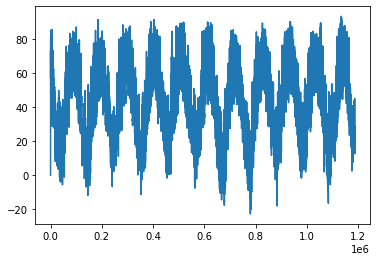

In [5]:
air_temperatures = get_noaa_temperatures('http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/', 'Gaylord', 100)
plt.plot(air_temperatures)
# plt.axis([0,1000,-20,80])

&#9989; **<font color=red>DO THIS:</font>** With your group, do a code review of the contents of the **noaa_scraper.py** file and figure out what it does. What are the main part of this module and what do they do? Be prepared to discuss this with the class. 

Put your notes here

----
<a name="Installing_Beautiful_Soup"></a>

# 2. Installing Beautiful Soup

For this class we will be trying out [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/), a Python web parsing module. 

&#9989; **<font color=red>DO THIS:</font>** Install the ```beautifulsoup4``` library on your computer (the following will work on jupyterhub but should work anywhere).  When you are done, help your neighbor and raise your hand if you need help.

In [6]:
#!mkdir packages

In [7]:
#!pip install -t ./packages/ beautifulsoup4

In [8]:
import sys
sys.path.append('./packages/')

----
<a name="Presidential_data_example"></a>
# 3. Presidential data example
This second example is a **_web scraper_** program. Found this idea by reading the following blog post: https://blog.exploratory.io/scraping-us-presidents-list-from-web-and-transforming-it-to-be-useful-fff534470bb6

&#9989; **<font color=red>DO THIS:</font>** Click on the following link and review the page source with your teams.  Discuss which tags you need to look for to try and isolate the table data only.  Ideally we want to create a ```pandas table``` of this data:
https://www.loc.gov/rr/print/list/057_chron.html


Put notes on what you find here.

## Download and view html

The following code should download the above website and parse read it into a ```beautifulsoup``` object:

In [2]:
#The following library downloads the data and stores it in a page variable
import requests
page = requests.get("https://www.loc.gov/rr/print/list/057_chron.html")

In [3]:
#Import and run beautifule should html.parser
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

&#9989; **<font color=red>DO THIS:</font>** explore the ```soup``` variable using python functions such as; ```type```, ```dir``` and ```help```.


In [ ]:
#Put your answer to the above here

In [ ]:
##ANSWER##
type(soup)
##ANSWER##

In [ ]:
##ANSWER##
dir(soup)
##ANSWER##

In [ ]:
##ANSWER##
help(soup)
##ANSWER##

In [ ]:
#Print out the raw html using "pretty print" 
print(soup.prettify())

## Find the Tables

Next, the following code finds all of the ```table``` sections in the website:

In [ ]:
tables = soup.find_all('table')

In [ ]:
type(tables)

In [ ]:
len(tables)

According to the above the results show that there are 9 ```table``` objects in the document.  We are just looking for the one that has our data in it. 



&#9989; **<font color=red>DO THIS:</font>** Find the table from the nine tables that has only the data we want. Make a variable ```table``` that only includes the information we want. Hint, it is not the first table which we can see by using the following code. 

In [ ]:
table = tables[0]
print(table.prettify())

In [ ]:
##ANSWER##
table = tables[3]
print(table.prettify())
##ANSWER##

## Parse out all the rows

The rows of a table are determined by the ```tr``` (table row) tag and the columns are determined by the ```td```. The following code can find all of the rows in the table:

In [ ]:
rows = table.find_all('tr')
rows

## Get the column labels

The first row is the column header row as can be seen by running the following code:

In [ ]:
rows[0]

In [ ]:
labels = []
for c in rows[0].find_all('th'):
    labels.append(c.get_text())
labels

## Parse Rows

&#9989; **<font color=red>DO THIS:</font>** The next step is to loop though the remaining rows and save the data as a list of lists

In [ ]:
#put your code here

In [ ]:
##ANSWER##

data = []    
for row in rows[1:]:
    myrow = []
    for c in row.find_all('td'):
        myrow.append(c.get_text())
    data.append(myrow)

##ANSWER##

## Convert list of list to Pandas Dataframe

Assuming the above works, we can convert the list of lists and labels to a Pandas Dataframe

In [ ]:
import pandas as pd  
    
# Create the pandas DataFrame  
df = pd.DataFrame(data, columns=labels)  

----

<a name="DynamicWebsites"></a>

# 4. Dynamic Website example

The two above examples were fairly simple. However, sometimes websites get a lot more complex.  This is especially true when the website includes "client side" code.  This code (typically javascript) runs on the web browser in your local computer and not the web server.  It makes the problem difficult because to pull the data out you often need to either figure out what the code is doing and mimic it in your python program or "render" the program using a javascript client and then figure out the output.  


Fortunatly there are tools that can help.  Have your team do a google search and see if you can find some python tools specifically designed to help render dynamic websites.  See if you can download/install and test the code.



---

<a name="Wrapup"></a>


# 5. Wrap-up Discussion

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----